# **Part I: Data preparation & analysis**

In [216]:
# To access our dataset file
from google.colab import drive
drive.mount('/content/drive/')
dataset_path = '/content/drive/Shareddrives/AAX/Resources/dataset_Seminar1.txt'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [217]:
# Importing modules, uncomment pip installations if importing results in errors

#!pip install pandas
#!pip install scikit-learn

import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## **1) Loading the dataset from the .txt file and storing the data in a structured manner.**

We begin the seminar by loading the dataset from the .txt file. We have decided to use Pandas because it is a powerful and efficient library for data science, and it includes many utilities and optimizations that ease our work.

In [218]:
# Create the dataframe from the TXT file
df = pd.read_csv(dataset_path, sep=" ", header=None)

# Change the name of the columns
df.columns = [
    "Number of STAs", "Load", "Size(x)", "Size(y)", "Area",
    "Contention window", "Channel width", "Packet size",
    "Max RSSI", "Avg. RSSI", "Min. RSSI","Avg. Probability of failure",
    "Throughput", "Average delay", "Total airtime",
    "Proportional airtime"
]

# Convert all possible columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Visualize the Dataframe
print(df)

       Number of STAs        Load  Size(x)  Size(y)    Area  \
0                40.0  60000000.0     22.0     39.0   858.0   
1                35.0  52500000.0     20.0     33.0   660.0   
2                16.0  12000000.0     34.0     14.0   476.0   
3                37.0  18500000.0     35.0      7.0   245.0   
4                18.0   4500000.0     36.0     35.0  1260.0   
...               ...         ...      ...      ...     ...   
99995            37.0  74000000.0     38.0     21.0   798.0   
99996            19.0  14250000.0     38.0     16.0   608.0   
99997            40.0  30000000.0     30.0      6.0   180.0   
99998            28.0  14000000.0     26.0      8.0   208.0   
99999             6.0  12000000.0     15.0     13.0   195.0   

       Contention window  Channel width  Packet size   Max RSSI  Avg. RSSI  \
0                   63.0           80.0       4000.0 -42.928330 -63.163012   
1                   31.0           40.0      10000.0 -47.815800 -63.298410   
2        

## **2) Displaying statistics about each feature (mean, standard deviation).**

We can use the built-in methods of the Pandas data frame to compute and display the mean and standard deviation of every column.

In [219]:
# Mean, Std per column
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Std: {df[col].std()}")


Column: Number of STAs
Mean: 21.44617
Std: 11.554365294756723

Column: Load
Mean: 21402920.0
Std: 18520420.534735885

Column: Size(x)
Mean: 20.56294
Std: 11.545206428396503

Column: Size(y)
Mean: 20.47964
Std: 11.540625517309564

Column: Area
Mean: 421.27035
Std: 360.34434886837636

Column: Contention window
Mean: 227.04392
Std: 323.3508545663531

Column: Channel width
Mean: 75.106
Std: 53.70427921029543

Column: Packet size
Mean: 7997.58
Std: 2825.5325126338657

Column: Max RSSI
Mean: -45.911165401990004
Std: 5.4002653047794045

Column: Avg. RSSI
Mean: -57.57742637042
Std: 6.108547533579559

Column: Min. RSSI
Mean: -66.46782748315
Std: 8.057527794685008

Column: Avg. Probability of failure
Mean: 0.22667609688
Std: 0.22484756924908125

Column: Throughput
Mean: 9716009.36023311
Std: 4958024.818157942

Column: Average delay
Mean: 4688176.278499954
Std: 7875887.345974391

Column: Total airtime
Mean: 0.7805603242800001
Std: 0.3604263498291898

Column: Proportional airtime
Mean: 0.66072399

## **3) Plotting relevant figures to visualize how data is distributed.**

For our model to be efficient, we have to know what variables affect the results we want to predict the most. In this case, the values to predict are: "Avg. Probability of failure", "Throughput", "Average delay", "Total airtime", and "Proportional airtime"

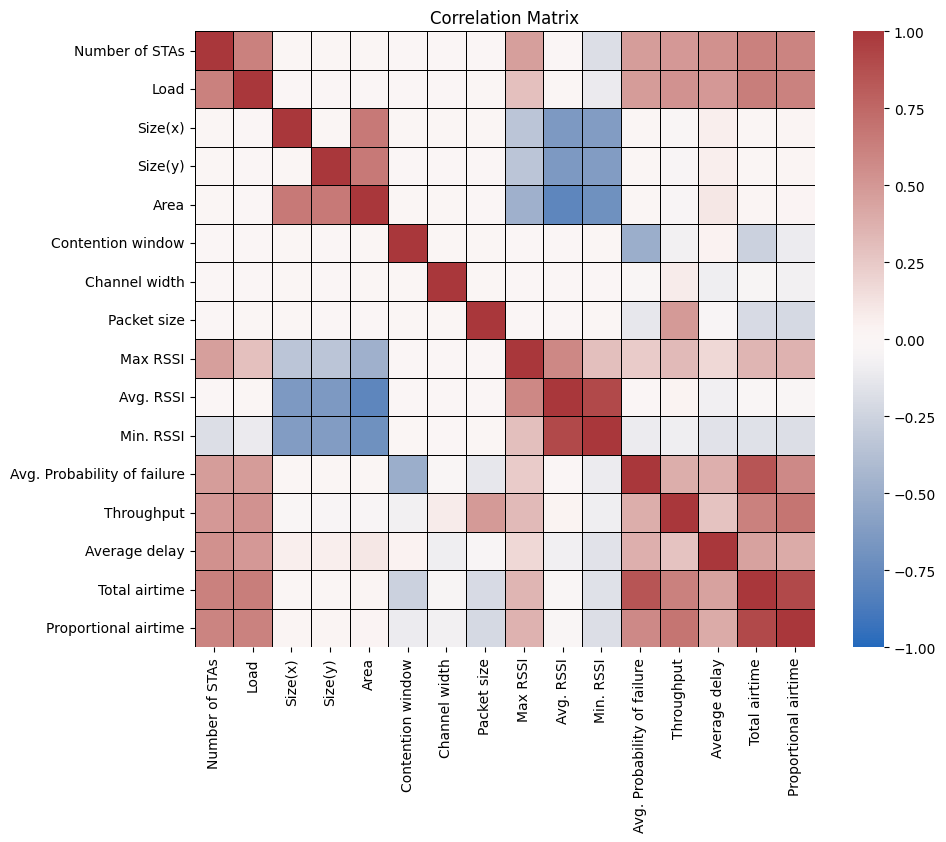

In [220]:
# Displaying correlation matrix to observe behaviour between features.
# Highly (in absolute value) correlated features might be interesting to study.

plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, vmin=-1.0, vmax=1.0 , cmap= "vlag", center=0.0,
            linewidths=0.7, linecolor='black', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Now we can focus on the row/column of the label we want to maximize and choose the parameters that are either red (directly proportional) or blue (inversely proportional).

Because our priority for the prediction is the throughput, we filter the features with an absolute correlation with the throughput bigger than 0.4.

In [221]:
# Rounding values to 3 decimal positions ONLY for display clarity.
# Isolating correlations of features with Throughput feature.
target_corrs = corr_matrix.loc["Throughput"]
print("Correlations array for Throughput:")
print(np.round(target_corrs,3).to_string())
# Applying a lax threshold to analyze which features might be influencing our target feature.
threshold = 0.4
filtered_corrs = target_corrs[np.abs(target_corrs) > threshold]
print(f"\nCorrelations array for Throughput with threshold of {threshold}:")
print(np.round(filtered_corrs,3).sort_values(ascending=False).to_string())

Correlations array for Throughput:
Number of STAs                 0.495
Load                           0.527
Size(x)                       -0.025
Size(y)                       -0.032
Area                          -0.039
Contention window             -0.071
Channel width                  0.082
Packet size                    0.491
Max RSSI                       0.321
Avg. RSSI                      0.039
Min. RSSI                     -0.088
Avg. Probability of failure    0.384
Throughput                     1.000
Average delay                  0.281
Total airtime                  0.618
Proportional airtime           0.686

Correlations array for Throughput with threshold of 0.4:
Throughput              1.000
Proportional airtime    0.686
Total airtime           0.618
Load                    0.527
Number of STAs          0.495
Packet size             0.491


<!-- <font color='blue'>  -->
Looking at the correlation matrix, we can observe that somewhat highly correlated features to the throughput feature are: \\
·&emsp;Load (0.527) \\
·&emsp;Number of STAs (0.495) \\
·&emsp;Packet Size (0.491) \\
<!-- ·&emsp;Proportional airtime (0.686) \\ -->





## **4) Processing the data (e.g., cleaning, normalization, categorical, etc.) and prepare it to be used by an ML model.**


To clean the data, we have eliminated all the rows that had an incorrect value, that is, a value that is not contained within the specified range in the slides. For example, if the number of stations was bigger than 40, we removed the row because 40 is the maximum value.

In [222]:
# Clean data
print(f"Rows before cleaning: {df.index.size}")
df.drop(df.index[df["Number of STAs"] > 40], inplace = True)

df.drop(df.index[df["Load"] > 82000000], inplace = True)
df.drop(df.index[df["Load"] < 500000], inplace = True)

df.drop(df.index[df["Size(x)"] > 40], inplace = True)
df.drop(df.index[df["Size(x)"] < 1], inplace = True)

df.drop(df.index[df["Size(y)"] > 40], inplace = True)
df.drop(df.index[df["Load"] < 1], inplace = True)

df.drop(df.index[~df["Contention window"].isin([3, 15, 31, 63, 127, 255, 511, 1023])], inplace = True)

df.drop(df.index[~df["Channel width"].isin([20, 40, 80, 160])], inplace = True)

df.drop(df.index[~df["Packet size"].isin([4000, 6000, 8000, 10000, 12000])], inplace = True)

df.drop(df.index[df["Max RSSI"] <-82], inplace = True)

df.drop(df.index[df["Min. RSSI"] <-82], inplace = True)

df.drop(df.index[df["Avg. RSSI"] <-82], inplace = True)

df.drop(df.index[df["Avg. Probability of failure"] <0], inplace = True)

df.drop(df.index[df["Avg. Probability of failure"] >1], inplace = True)

df.drop(df.index[df["Proportional airtime"] <0], inplace = True)

df.drop(df.index[df["Proportional airtime"] >1], inplace = True)

print(f"Rows after cleaning: {df.index.size}")

Rows before cleaning: 100000
Rows after cleaning: 86471


We then check the range of throughputs we have in the dataset.

In [223]:
# Min and Max values of the throughput:
max_throughput = df["Throughput"].max()
min_throughput = df["Throughput"].min()

print(f"Maximum Throughput: {max_throughput}")
print(f"Minimum Throughput: {min_throughput}")


Maximum Throughput: 22622729.083795
Minimum Throughput: 500000.0


## **5) Splitting the data into different partitions to be used for training (e.g., 80%) and testing (e.g., 20%).**

Then, we create two data frames from the original data frame; one (X) contains the features we have deemed important for throughput prediction, and the other (y) contains the labels to predict.

After splitting the data in training and testing, we set up a transformator to apply a min-max scaling to the features. Then we transform the split input data.

In [224]:
# Separate Features (X) and Targets (y)
X = df[[
    "Number of STAs", "Load", "Packet size", "Max RSSI"
]]
y = df[[
    "Avg. Probability of failure", "Throughput",
    "Average delay", "Total airtime", "Proportional airtime"
]]

# Split data FIRST to avoid leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        # # StandardScaler for continuous/unbounded features
        # ('std_scaler', StandardScaler(), [
        #     "Load", "Max RSSI"
        # ])

        # MinMaxScaler for ordinal/discrete features
        ('minmax_scaler', MinMaxScaler(), [
            "Number of STAs",  "Packet size", "Load", "Max RSSI"
        ])
    ],
    remainder='passthrough'  # Not needed here (all columns are listed)
)
# Fit scaler on training data ONLY, then transform both train/test
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)  # Use the same scaler fitted on train

# **Part II: Model implementation**

## **1) Fitting the data into an ML model (in this case, a multi-variable linear regression), i.e., estimating the coefficients of the model.**

Now, it is time to create the model. We use scikit-learn's built-in multi-variable linear regression and train it with the scaled data.

In [225]:
# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train_scaled,y_train)

LinearRegression()

## **2) Evaluating the performance of the model using a given error function.**

To check the performance of the model, we compute the Mean Squared Error (MSE) and the Mean Absolute Error (MAE). We can also check the coefficients to see what impacts the most in the predictions.

In [226]:
# making predictions
y_pred = model.predict(X_test_scaled)

y_pred_df = pd.DataFrame(y_pred, columns=y.columns)

# Print for each target the MSE and MAE
for col in y.columns:
    mse = mean_squared_error(y_test[col], y_pred_df[col])
    mae = mean_absolute_error(y_test[col], y_pred_df[col])
    r2 = r2_score(y_test[col], y_pred_df[col])

    print(f"{col}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R² : {r2:.2f}\n")

coefficients_df = pd.DataFrame(
    model.coef_,
    columns=X.columns,  # 4 feature names
    index=y.columns  # 5 target names
)

print("\nCoefficients per target:")
print(coefficients_df)

Avg. Probability of failure:
  MSE: 0.03
  MAE: 0.14
  R² : 0.29

Throughput:
  MSE: 10497461699272.35
  MAE: 2601696.35
  R² : 0.58

Average delay:
  MSE: 8143121413140.31
  MAE: 2044323.36
  R² : 0.68

Total airtime:
  MSE: 0.06
  MAE: 0.20
  R² : 0.54

Proportional airtime:
  MSE: 0.03
  MAE: 0.15
  R² : 0.52


Coefficients per target:
                             Number of STAs          Load   Packet size  \
Avg. Probability of failure    1.909895e-01 -7.561262e-02  2.801126e-01   
Throughput                     3.814090e+06  6.824131e+06  7.986493e+06   
Average delay                  9.793962e+06 -7.471071e+05  8.488954e+06   
Total airtime                  4.009298e-01 -2.085463e-01  6.283154e-01   
Proportional airtime           2.796376e-01 -1.557801e-01  4.539948e-01   

                                 Max RSSI  
Avg. Probability of failure  2.935821e-02  
Throughput                   4.278346e+06  
Average delay               -3.897740e+06  
Total airtime                2.0

For the throughput, we have an MAE of approximately 2M. It is not ideal, but it is not bad either, considering the range of throughputs the dataset includes.

In [227]:
print(f"MAE (M): {mean_absolute_error(y_test['Throughput'], y_pred_df['Throughput'])*10**-6}")
print(f"Throughput (Mbps): {df.Throughput.min()*10**-6} - {df.Throughput.max()*10**-6}")

MAE (M): 2.601696351977381
Throughput (Mbps): 0.5 - 22.622729083794997


Checking the R² value is another way of verifying the accuracy, with a 1 being perfect accuracy and a 0 not being accurate at all. The R² value is average for the total and proportional airtime and the throughput. It gets low for the average probability of failure, and, at the same time, it is abnormally high for the average delay.

In [228]:
# Calculate metrics per target
for i, target in enumerate(y.columns):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"{target}: MSE = {mse:.2f}, R² = {r2:.2f}")

Avg. Probability of failure: MSE = 0.03, R² = 0.29
Throughput: MSE = 10497461699272.35, R² = 0.58
Average delay: MSE = 8143121413140.31, R² = 0.68
Total airtime: MSE = 0.06, R² = 0.54
Proportional airtime: MSE = 0.03, R² = 0.52


## **3) Plotting the results visually (e.g., training loss, test accuracy).**

Next, we plot results of the model, beginning with the throughput residuals.

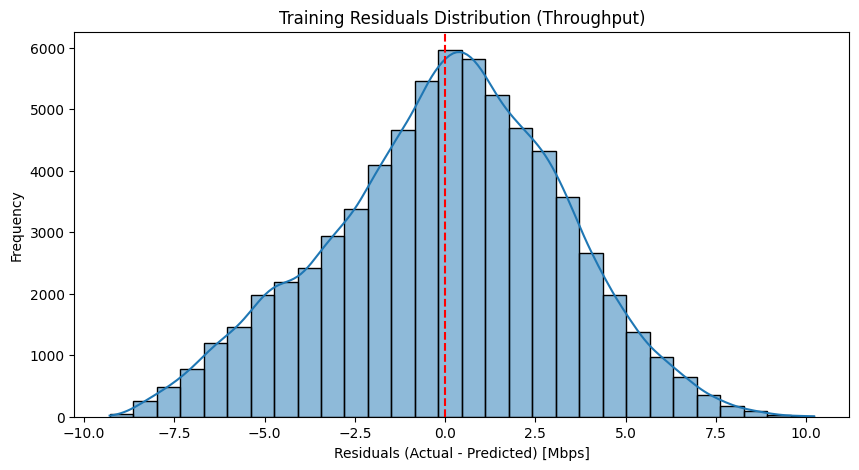

In [229]:
# Calculate training residuals
y_train_pred = model.predict(X_train_scaled)
train_residuals = (y_train["Throughput"] - y_train_pred[:, y.columns.get_loc("Throughput")]) / 10**6

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(train_residuals, kde=True, bins=30)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Training Residuals Distribution (Throughput)')
plt.xlabel('Residuals (Actual - Predicted) [Mbps]')
plt.ylabel('Frequency')
plt.show()

The graph indicates that the prediction of the training data is mostly right. The normal distribution is centered around the 0 difference and there are not many big errors in the predictions. Nevertheless, the numbers are quite high considering the range of Mbps is 0.5-22.62, and this makes sense considering the R² is 0.58.

Next, we plot the distribution of predicted values of Y in a 2D graph, where X is the real data and Y the predicted data.

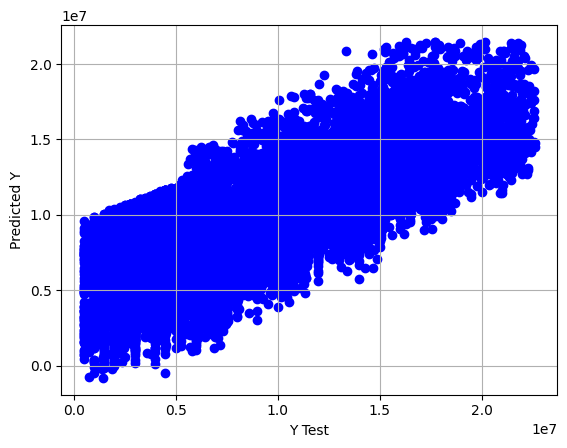

In [230]:
Actual_throughput = y_test['Throughput'].values
Predicted_throughput = y_pred[:,1]

# Throughput
plt.scatter(Actual_throughput, Predicted_throughput, c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

Although not perfect, the predicted and tested values are clearly correlated. That means the predictions are somewhat accurate.

Next, let's see the overlap between actual and predicted values.

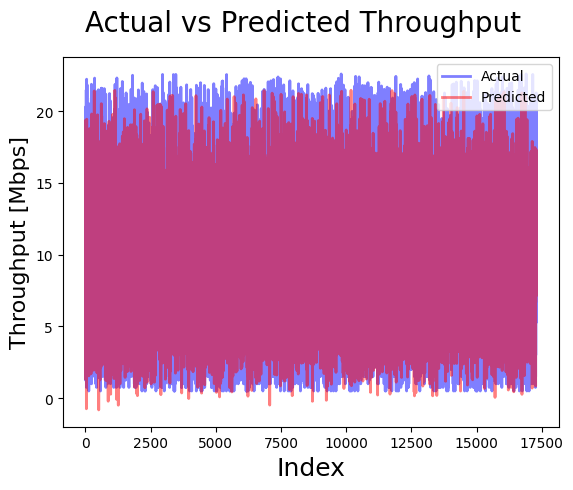

In [231]:
c = range(len(y_test))  # Matches full length

actual = y_test["Throughput"]/ 10**6
predicted = y_pred_df["Throughput"]/ 10**6

fig = plt.figure()
plt.plot(c, actual, color="blue", linewidth=2, linestyle="-", label="Actual", alpha=0.5)
plt.plot(c, predicted, color="red", linewidth=2, linestyle="-", label="Predicted", alpha=0.5)
fig.suptitle('Actual vs Predicted Throughput', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Throughput [Mbps]', fontsize=16)
plt.legend()
plt.show()


Most of the time, the predicted values are far from the actual values, which further reinforces our conclusion that the model is not very efficient at predicting the throughput.

Next we see in more detail the differences in prediction by focusing on the first 60 elements.

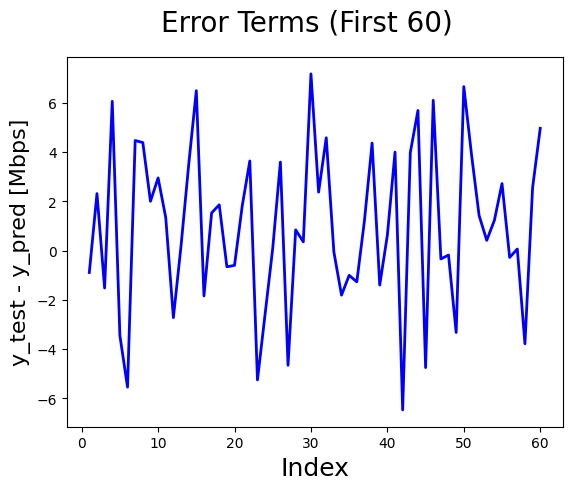

In [232]:
# Get the index of the 'Throughput' column
throughput_index = y.columns.get_loc("Throughput")  # y is your original full DataFrame

c = [i for i in range(1, 61)]
residuals_sample = train_residuals[:60]

fig = plt.figure()
plt.plot(c, residuals_sample, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms (First 60)', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('y_test - y_pred [Mbps]', fontsize=16)
plt.show()



By looking at the first 60 elements, the trend we can see is that the error is rarely close to 0, and there are various peaks that reach an absolute difference of 6 Mbps. This contrasts a bit with what we have seen previously looking at the whole dataset, because the error seems to be almost always “big” and rarely around 0. However, it also makes sense because the predictions are far from perfect and the model still performs quite poorly.

Finally, we plot the actual and predicted values for the First 60 elements.

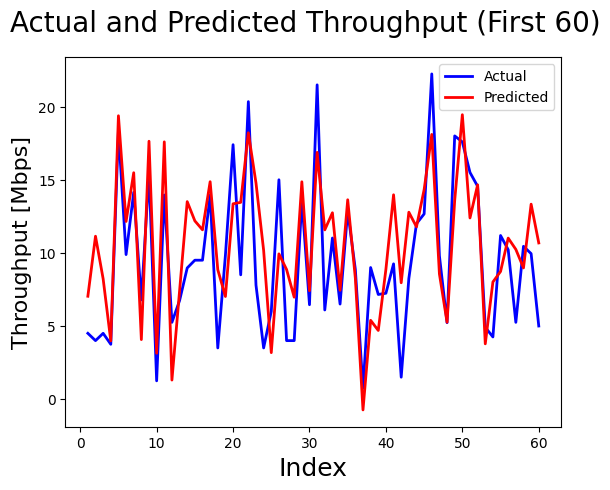

In [233]:
# Generate index
c = [i for i in range(1, 61)]

# Take the first 60 values from each
actual = (y_test["Throughput"].iloc[:60])/ 10**6
predicted = y_pred_df["Throughput"].iloc[:60] / 10**6

# Plot
fig = plt.figure()
plt.plot(c, actual, color="blue", linewidth=2, linestyle="-", label="Actual")
plt.plot(c, predicted, color="red", linewidth=2, linestyle="-", label="Predicted")
fig.suptitle('Actual and Predicted Throughput (First 60)', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Throughput [Mbps]', fontsize=16)
plt.legend()
plt.show()


Although similar to the error graph seen before, we can now observe how the predictions follow the values of the actual data. It is not as accurate at predicting, but it still gets quite close, as when the actual throughput rises, the predicted also rises.

#**3) Part III: Model improvements**

We optimized the model by using PowerTransform instead of doing a min-max scaling, as the performance is quite better according to the MSE and R$^2$ score. The power transform is explained in more detail in Seminar 2 because this optimization was done after that one, but it basically tries to modify the data so it follows a Gaussian distribution.

In [234]:
from sklearn.preprocessing import PowerTransformer

df = pd.read_csv(dataset_path, sep=" ", header=None)

df.columns = [
    "Number of STAs", "Load", "Size(x)", "Size(y)", "Area",
    "Contention window", "Channel width", "Packet size",
    "Max RSSI", "Avg. RSSI", "Min. RSSI","Avg. Probability of failure",
    "Throughput", "Average delay", "Total airtime",
    "Proportional airtime"
]

df = df.apply(pd.to_numeric, errors='coerce')

df.drop(df.index[df["Number of STAs"] > 40], inplace = True)

df.drop(df.index[df["Load"] > 82000000], inplace = True)
df.drop(df.index[df["Load"] < 500000], inplace = True)

df.drop(df.index[df["Size(x)"] > 40], inplace = True)
df.drop(df.index[df["Size(x)"] < 1], inplace = True)

df.drop(df.index[df["Size(y)"] > 40], inplace = True)
df.drop(df.index[df["Load"] < 1], inplace = True)

df.drop(df.index[~df["Contention window"].isin([3, 15, 31, 63, 127, 255, 511, 1023])], inplace = True)

df.drop(df.index[~df["Channel width"].isin([20, 40, 80, 160])], inplace = True)

df.drop(df.index[~df["Packet size"].isin([4000, 6000, 8000, 10000, 12000])], inplace = True)

df.drop(df.index[df["Max RSSI"] <-82], inplace = True)

df.drop(df.index[df["Min. RSSI"] <-82], inplace = True)

df.drop(df.index[df["Avg. RSSI"] <-82], inplace = True)

df.drop(df.index[df["Avg. Probability of failure"] <0], inplace = True)

df.drop(df.index[df["Avg. Probability of failure"] >1], inplace = True)

df.drop(df.index[df["Proportional airtime"] <0], inplace = True)

df.drop(df.index[df["Proportional airtime"] >1], inplace = True)

X = df[[
    "Number of STAs", "Load", "Packet size", "Max RSSI"
]]
y = df[[
    "Avg. Probability of failure", "Throughput",
    "Average delay", "Total airtime", "Proportional airtime"
]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### New/Changed ###
preprocessor = ColumnTransformer(
    transformers=[
        ('power_transform', PowerTransformer(), [
            "Number of STAs",  "Packet size", "Load", "Max RSSI"
        ])
    ],
    remainder='passthrough'  # Not needed here (all columns are listed)
)
###################
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

for i, target in enumerate(y.columns):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"{target}: MSE = {mse:.2f}, R² = {r2:.2f}")

Avg. Probability of failure: MSE = 0.03, R² = 0.33
Throughput: MSE = 7021719633110.61, R² = 0.72
Average delay: MSE = 9362161478355.45, R² = 0.63
Total airtime: MSE = 0.04, R² = 0.70
Proportional airtime: MSE = 0.02, R² = 0.72


All the R2 values increase except for the average delay, meaning our prediction is better now in almost every way. The most important value we wanted to predict, the throughput, has an increase of 0.14.

Now we watch the evolution of the graphs from part 2.3

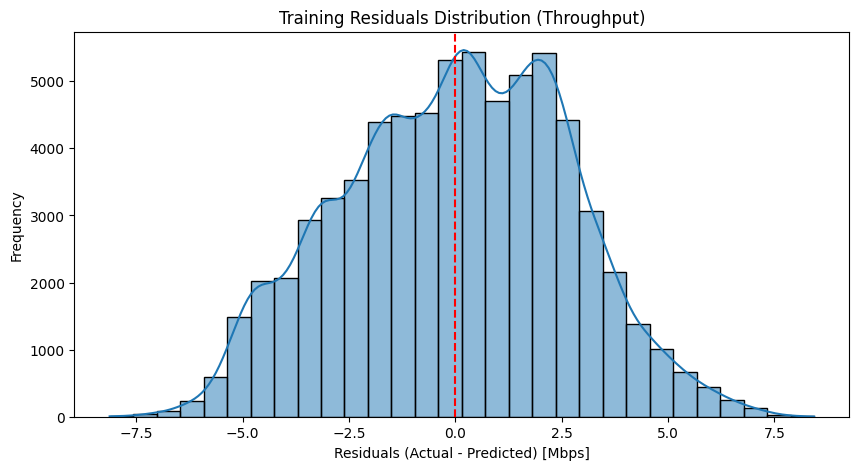

In [235]:
# Calculate training residuals
y_train_pred = model.predict(X_train_scaled)
train_residuals = (y_train["Throughput"] - y_train_pred[:, y.columns.get_loc("Throughput")]) / 10**6

y_pred_df = pd.DataFrame(y_pred, columns=y.columns)

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(train_residuals, kde=True, bins=30)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Training Residuals Distribution (Throughput)')
plt.xlabel('Residuals (Actual - Predicted) [Mbps]')
plt.ylabel('Frequency')
plt.show()

The training residuals distribution for the throughput does something curious. Before the optimizations, it resembled more a Gaussian distribution, with the 0 bin being the mean and the one with the highest frequency of occurrences. Now, however, the distribution is slightly skewed to the right, and the number of occurrences is more evenly distributed along a shorter span.

In other words, there are fewer predictions with extreme differences to the original values (as seen in how the distribution “ends” before reaching 10.0 or -10.0 now), there are fewer predictions with 0 error (the 0.0 bin is not the one with the highest frequency, and it has around 5000 occurrences instead of the almost 6000 it had before), and there are more occurrences of small-to-mid errors (the number of predictions with differences more or less between -3 and 3 increase in relation to before, excluding -0.5 to 1.5).

This could be caused because of the difference in scaling technique used, although it does not look like it should heavily affect the result of the training residuals. At a glance, it looks like the graph from before the optimization would have a better performance in predicting data; however, the performance of the optimized model with the test data is better.

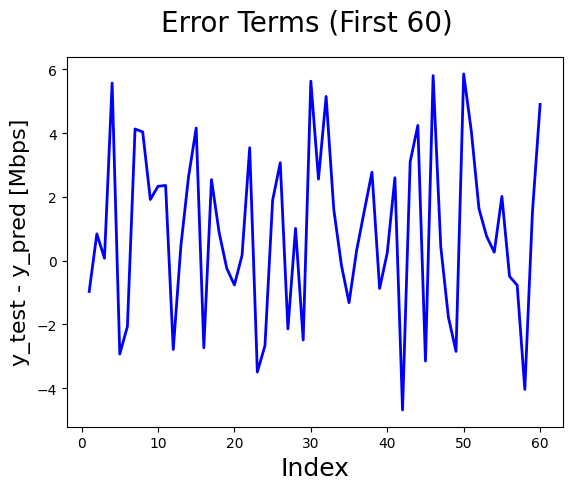

In [236]:
# Get the index of the 'Throughput' column
throughput_index = y.columns.get_loc("Throughput")  # y is your original full DataFrame

c = [i for i in range(1, 61)]
residuals_sample = train_residuals[:60]
fig = plt.figure()
plt.plot(c, residuals_sample, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms (First 60)', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('y_test - y_pred [Mbps]', fontsize=16)
plt.show()

The error terms graph for the first 60 differences aligns with the graph covered before. The first 60 prediction errors are not as high as before. In the first model, the error could go as far as 6 or -6; meanwhile, now the errors are contained within -4 and 4. Now, however, the same effect highlighted before where the samples with error near 0 have decreased is present, and there are not as many points with a difference close to 0 as before, or the difference of those points has increased.

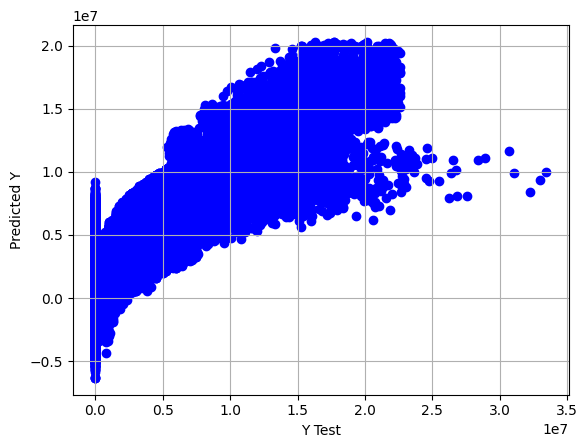

In [237]:

plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()


The comparison between the predicted Y and the tested Y shows similar results. For a perfect prediction, the points should form a line, so a good prediction has most of its points follow a diagonal line in which $x = y$. The graph takes into account the prediction of all values, not just the throughput. In our case, the optimization shows a bigger number of incorrect predictions in $x = 0$, with $x$ being the test values. When the true value was 0, the prediction performed poorly, which is explained by the reduction in quality from the average delay predictions, as those values were mainly close to 0.

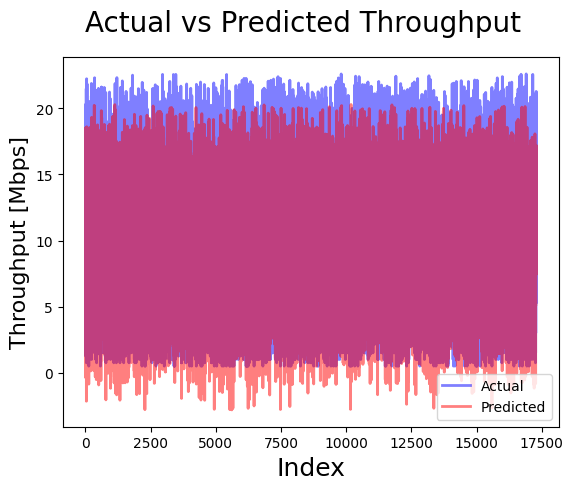

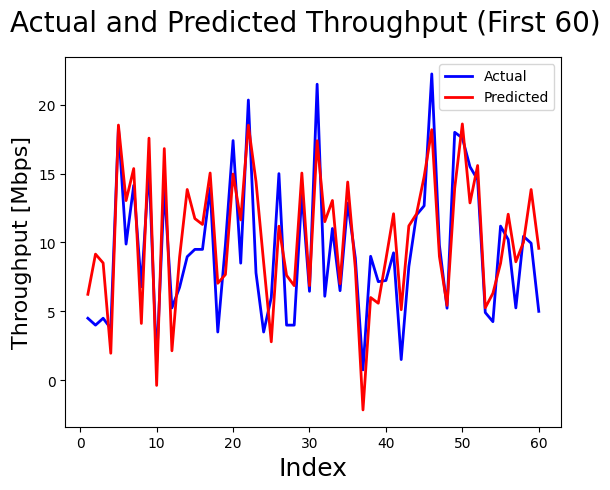

In [238]:
c = range(len(y_test))  # Matches full length

actual = y_test["Throughput"]/ 10**6
predicted = y_pred_df["Throughput"]/ 10**6
actual = actual.reset_index(drop=True)
predicted = predicted.reset_index(drop=True)

fig = plt.figure()
plt.plot(c, actual, color="blue", linewidth=2, linestyle="-", label="Actual", alpha=0.5)
plt.plot(c, predicted, color="red", linewidth=2, linestyle="-", label="Predicted", alpha=0.5)
fig.suptitle('Actual vs Predicted Throughput', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Throughput [Mbps]', fontsize=16)
plt.legend()
plt.show()

# Generate index
c = [i for i in range(1, 61)]

# Take the first 60 values from each
actual = (y_test["Throughput"].iloc[:60])/ 10**6
predicted = y_pred_df["Throughput"].iloc[:60] / 10**6

# Plot
fig = plt.figure()
plt.plot(c, actual, color="blue", linewidth=2, linestyle="-", label="Actual")
plt.plot(c, predicted, color="red", linewidth=2, linestyle="-", label="Predicted")
fig.suptitle('Actual and Predicted Throughput (First 60)', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Throughput [Mbps]', fontsize=16)
plt.legend()
plt.show()

The Actual vs. Predicted Throughput graph looks worse than the original model without the optimizations. It looks like the predicted values generally got lower, but this may be because of the amount of values the graph is trying to load at the same time. When looking at the first 60 values, we can see how the graph is an improvement over the first model. Although now there are more values that are predicted lower than they really are (which aligns with the previous graph with all the points), the red line follows the blue line more closely.